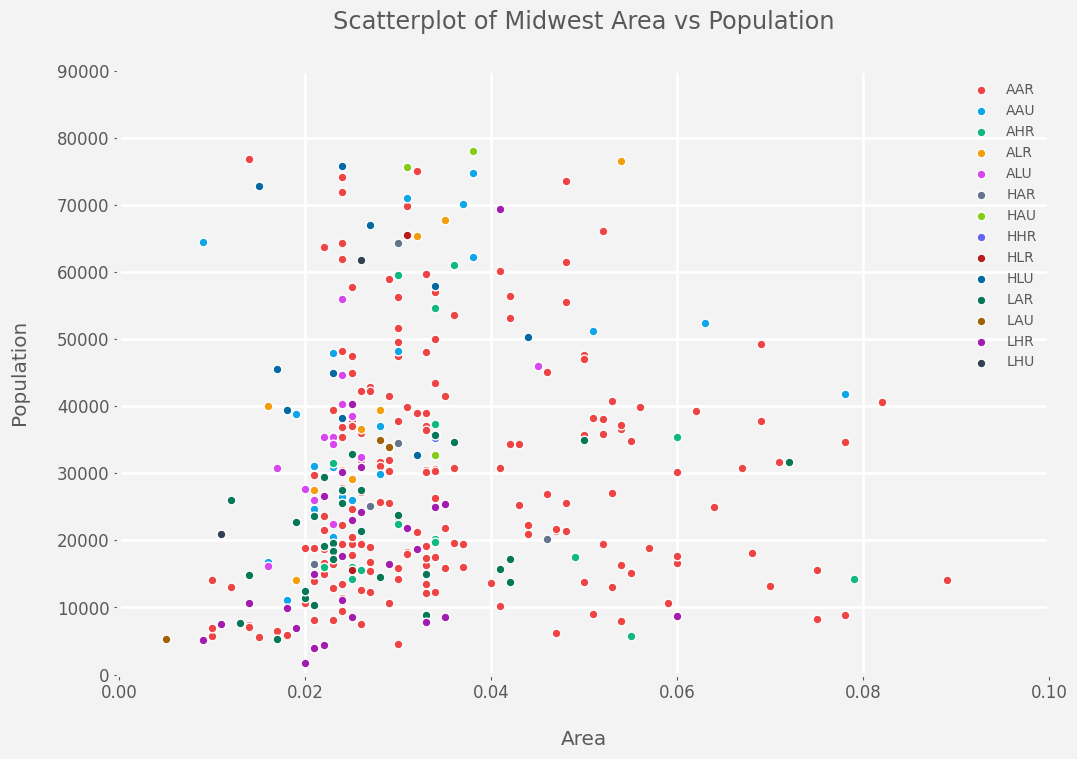

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("gray_style")

# Import dataset
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s=40, label=str(category))

# Decorations
plt.gca().set(xlim = (0.0, 0.1), ylim = (0, 90000),
              xlabel = 'Area', ylabel = 'Population')
plt.title("Scatterplot of Midwest Area vs Population")
plt.legend()
plt.show()

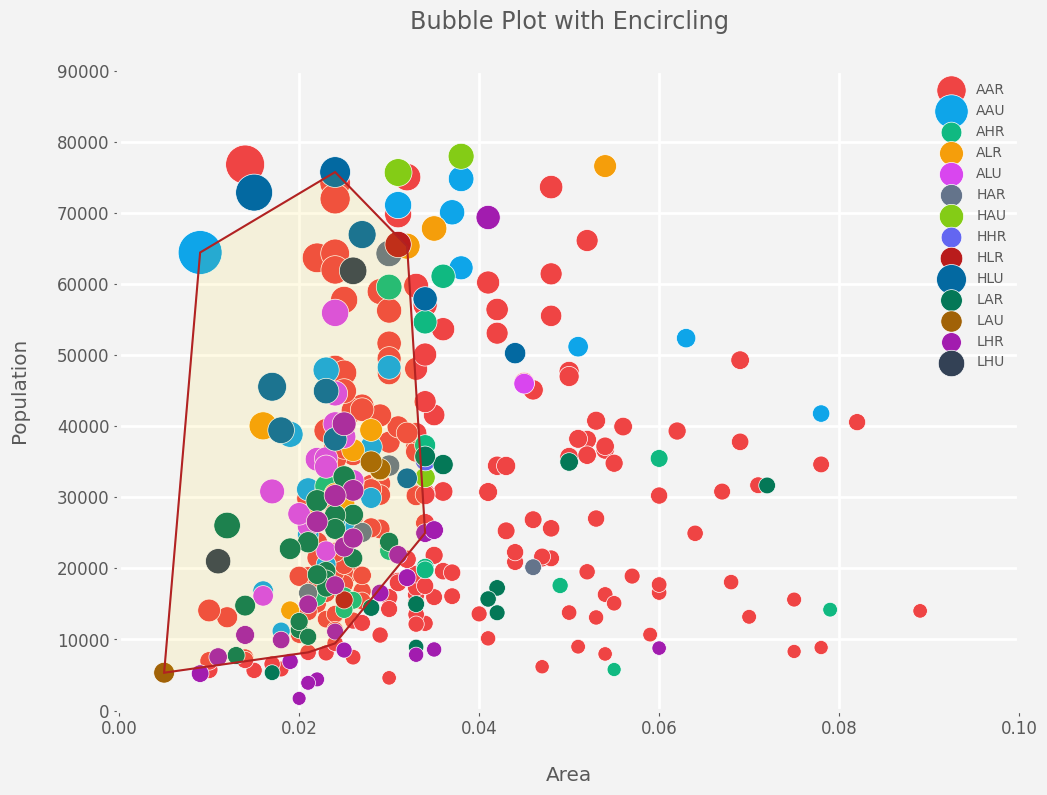

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


from matplotlib import patches
from scipy.spatial import ConvexHull

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

categories = np.unique(midwest['category'])

# Step 2: Draw Scatterplot with unique color for each category
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', label=str(category), linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.title("Bubble Plot with Encircling")
plt.legend()
plt.subplots_adjust(left=0.15, bottom=0.1, top=0.9, right=0.9)
plt.show()

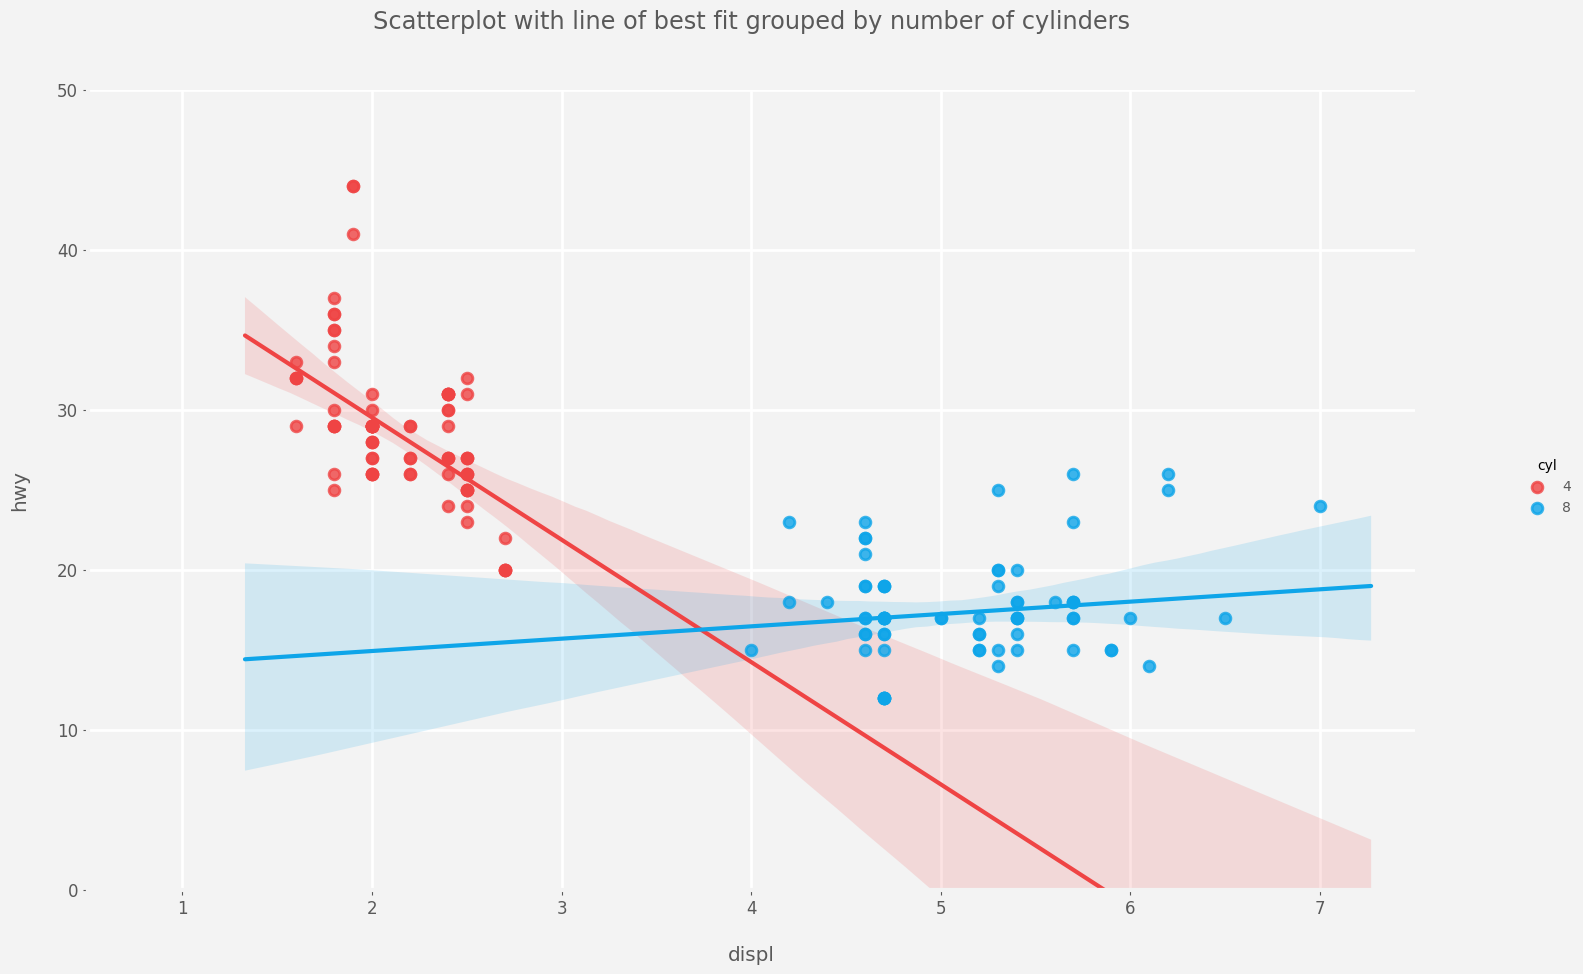

In [3]:
"""
seaborn.lmplot メソッドは、seaborn.regplot の機能に加えて、複数のグラフをまとめて 1 度に出力する機能 (FacetGrid) を持っている点が特徴。

注意点
・FacetGridを返すreplot、catplot、lmplotはdataframeのキーを使用しないタイトルは描画できない。
　grid.fig.suptitle()を使用すれば、キーを使用しないタイトルはグラフ上部に重ねてなら表示することはできる。
"""
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
grid = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,
            height=10, aspect=1.6, robust=True, truncate=False, # truncate=False:回帰直線を端から端までプロット
            scatter_kws=dict(s=60))

# Decorations
grid.fig.suptitle("Scatterplot with line of best fit grouped by number of cylinders", c="#595959")
grid.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)
plt.show(block = True)

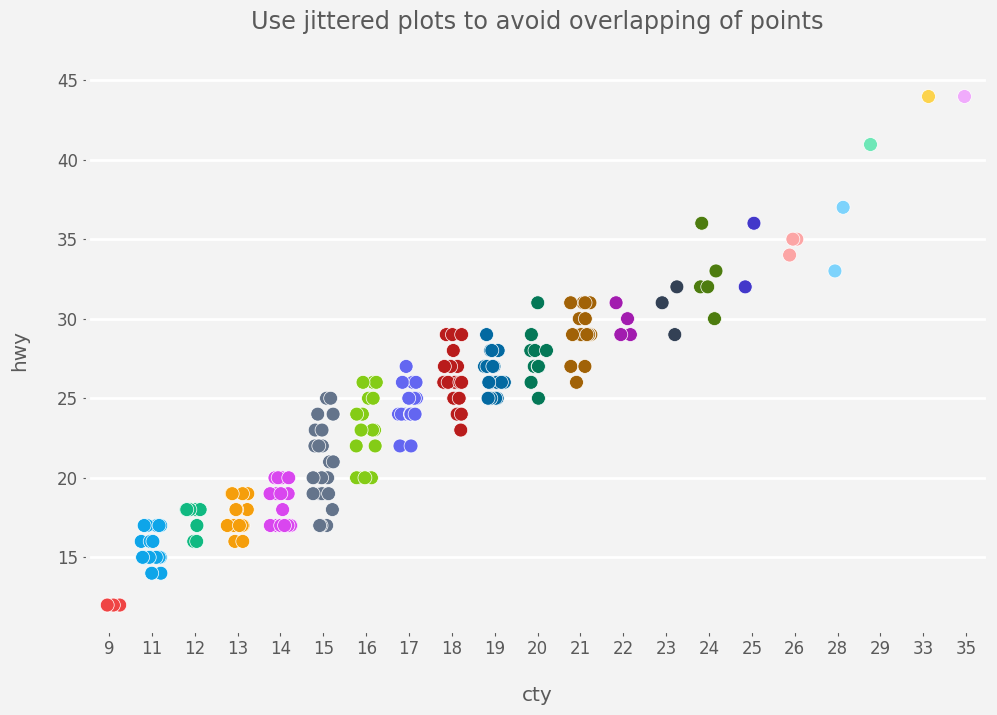

In [4]:
"""
jitter plot：
    本来の値に小さな値をランダムに足し引きし、点が重ならないようにグラフ化

一つの調査項目に対して、複数サンプルが調査され、中には同じ値が得られる場合がある。
このようなデータを点グラフで表すと、同じ値は同じ所にプロットされる。
そのため、点と点が重なってデータの数を確認できなくなる。
そこで、このようなデータに微小な値を足したり、引いたりして、
本来の値から少しだけずらすことで、点が重ならないような点グラフを描けるようになる。

引用元：https://stats.biopapyrus.jp/python/jitterplot.html
"""
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=10, linewidth=.5, edgecolor="#ffffff")

# Decorations
plt.title('Use jittered plots to avoid overlapping of points')
plt.subplots_adjust(left=0.15, bottom=0.15, top=0.85, right=0.9)
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

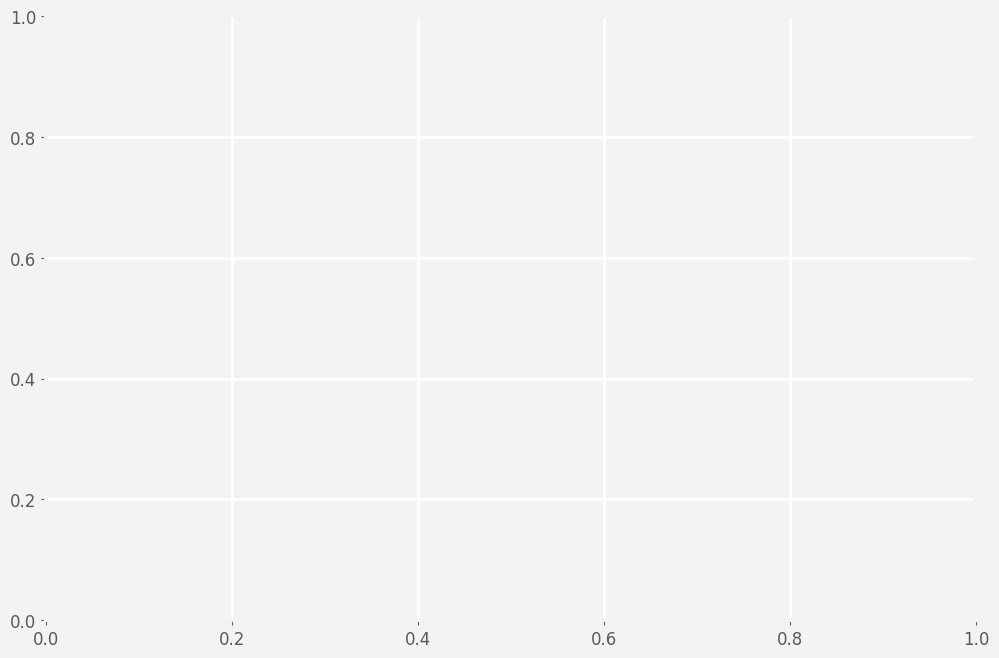

In [5]:
"""
注意事項
・python 3.10系ではmatplotlib<=3.2がインストールできずプロット不可。
    下記のバージョンでプロット確認。
    python : 3.6.8
    matplotlib : 3.1.0
    seaborn : 0.11.2
    pandas : 1.1.5
"""

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
a = df_counts.cty
b = df_counts.hwy
s = df_counts.counts*2
c = type(a)
sns.stripplot(df_counts.cty, df_counts.hwy, size=s)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap')
plt.show()

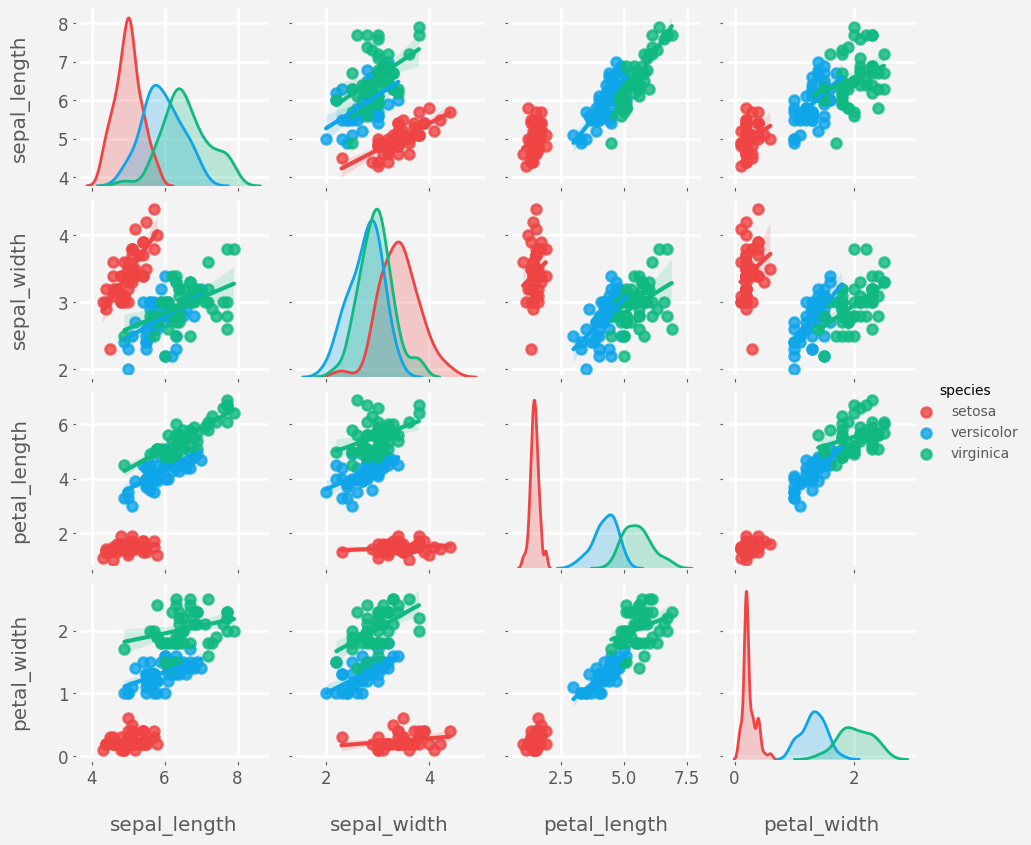

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = sns.load_dataset('iris')

# Plot
sns.pairplot(df, kind="reg", hue="species")
plt.subplots_adjust(left=0.15, bottom=0.15, top=0.9, right=0.9)
plt.show()

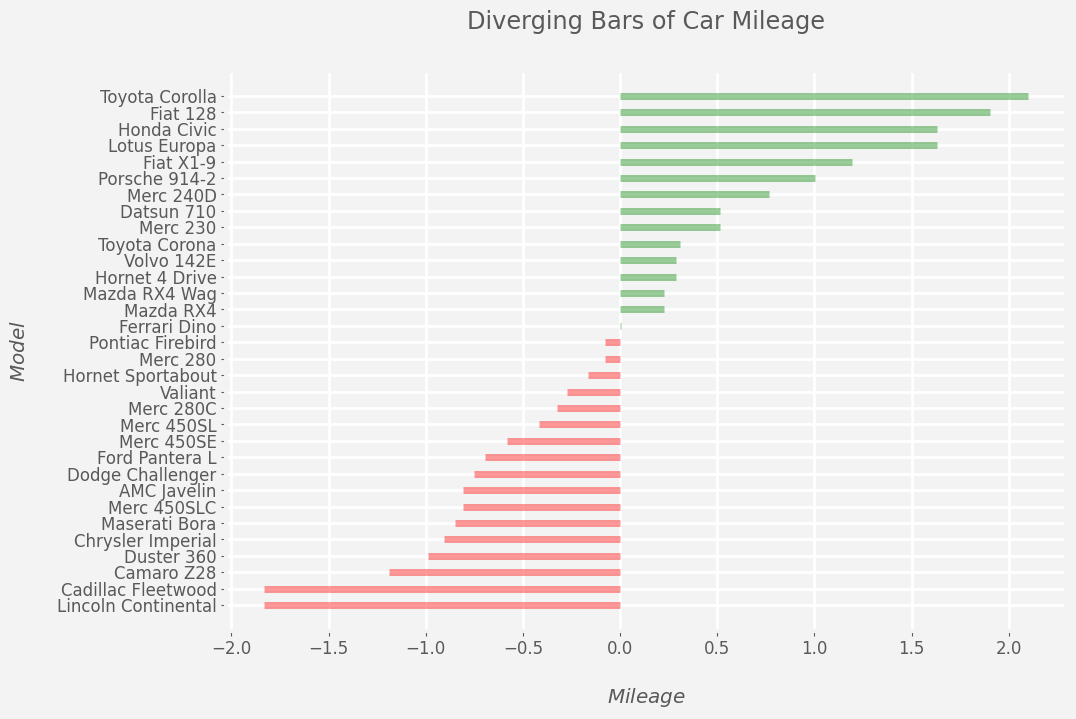

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars)
plt.title('Diverging Bars of Car Mileage')
plt.subplots_adjust(left=0.2, bottom=0.15, top=0.85, right=0.9)
plt.show()

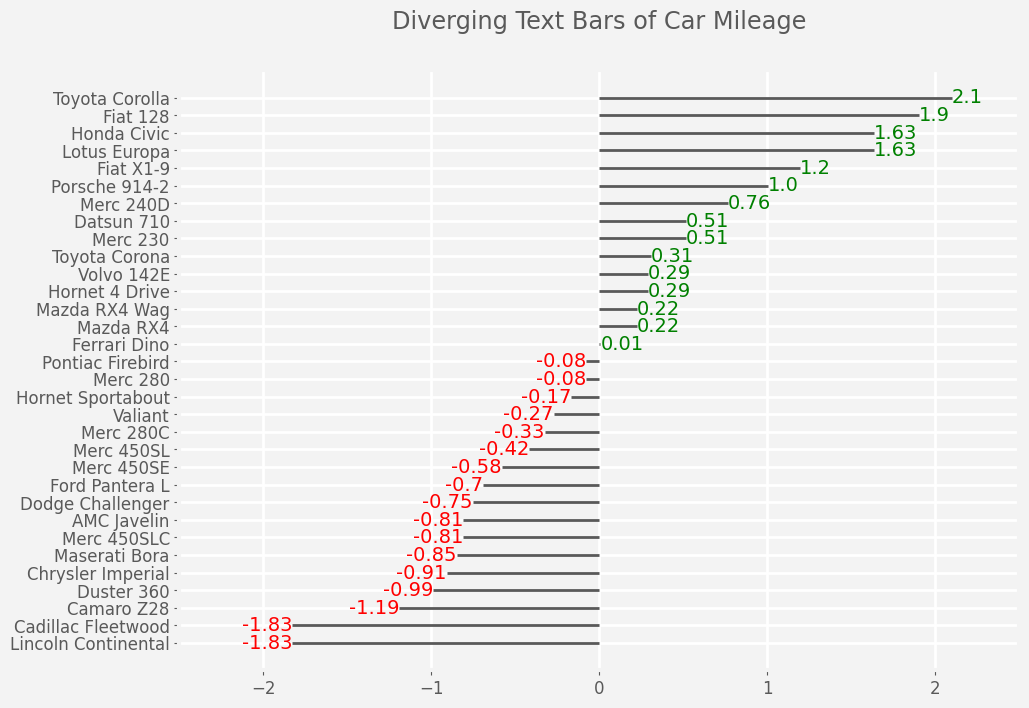

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, colors=["#595959"])
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations
plt.yticks(df.index, df.cars)
plt.title('Diverging Text Bars of Car Mileage')
plt.xlim(-2.5, 2.5)
plt.subplots_adjust(left=0.2, bottom=0.1, top=0.85, right=0.9)
plt.show()

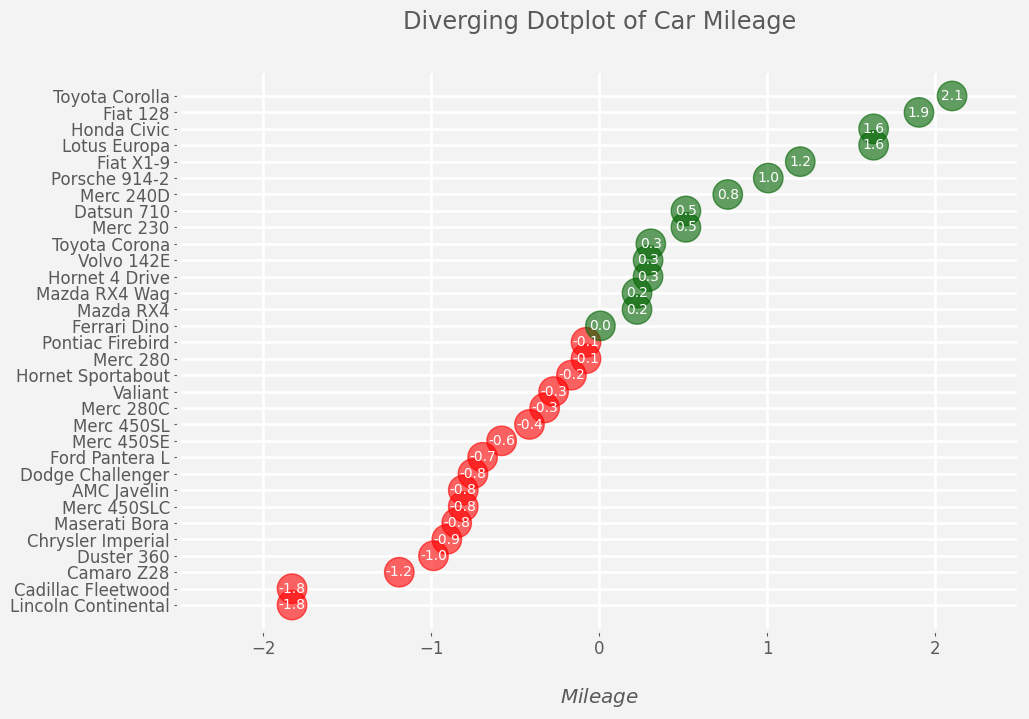

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage')
plt.xlabel('$Mileage$')
plt.xlim(-2.5, 2.5)
plt.subplots_adjust(left=0.2, bottom=0.15, top=0.85, right=0.9)
plt.show()

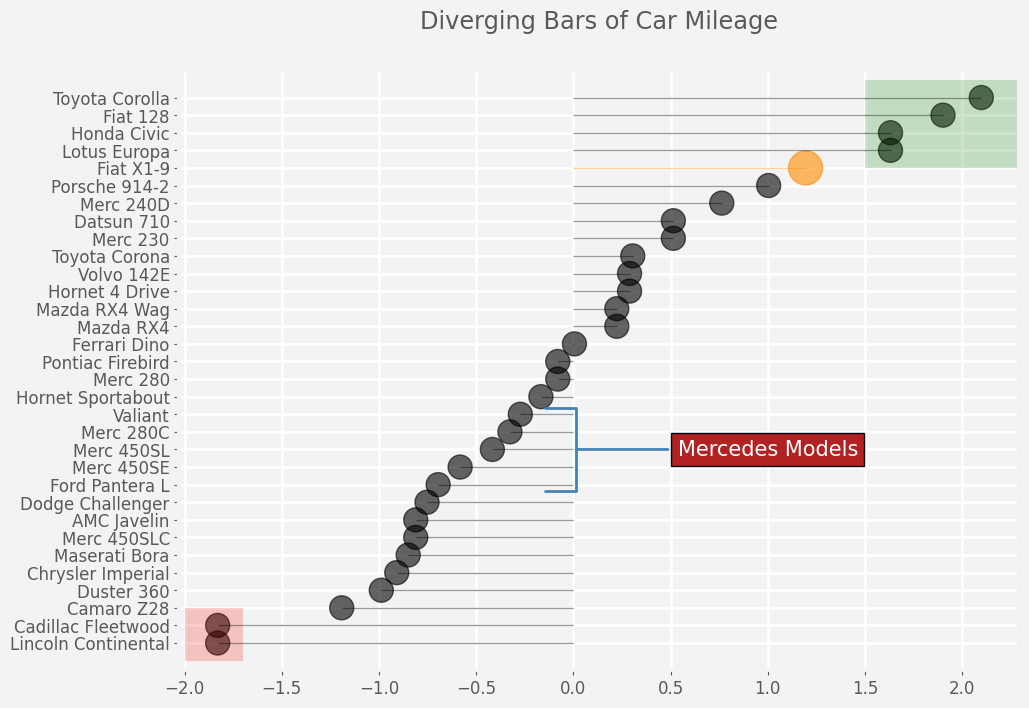

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# Draw plot
import matplotlib.patches as patches

plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage')
plt.subplots_adjust(left=0.2, bottom=0.1, top=0.85, right=0.9)
plt.show()

<ipython-input-12-5681d637c918>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


Rectangle(xy=(0.57, 0.05), width=0.33, height=0.15, angle=0) <class 'matplotlib.patches.Rectangle'>


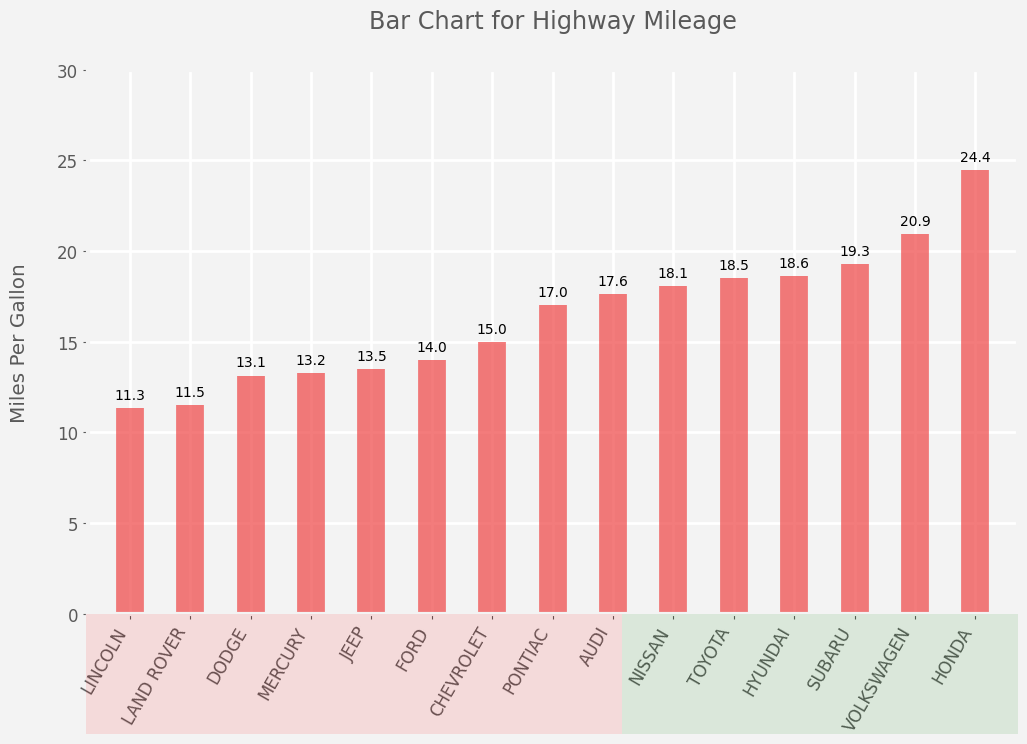

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots()
ax.vlines(x=df.index, ymin=0, ymax=df.cty, alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage')
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right')

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, 0.05), width=.33, height=.15, alpha=.1, facecolor='green', transform=fig.transFigure)
print(p1, type(p1))
p2 = patches.Rectangle((.124, 0.05), width=.446, height=.15, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.subplots_adjust(bottom=0.2)
plt.show()

<ipython-input-13-dd668addc768>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


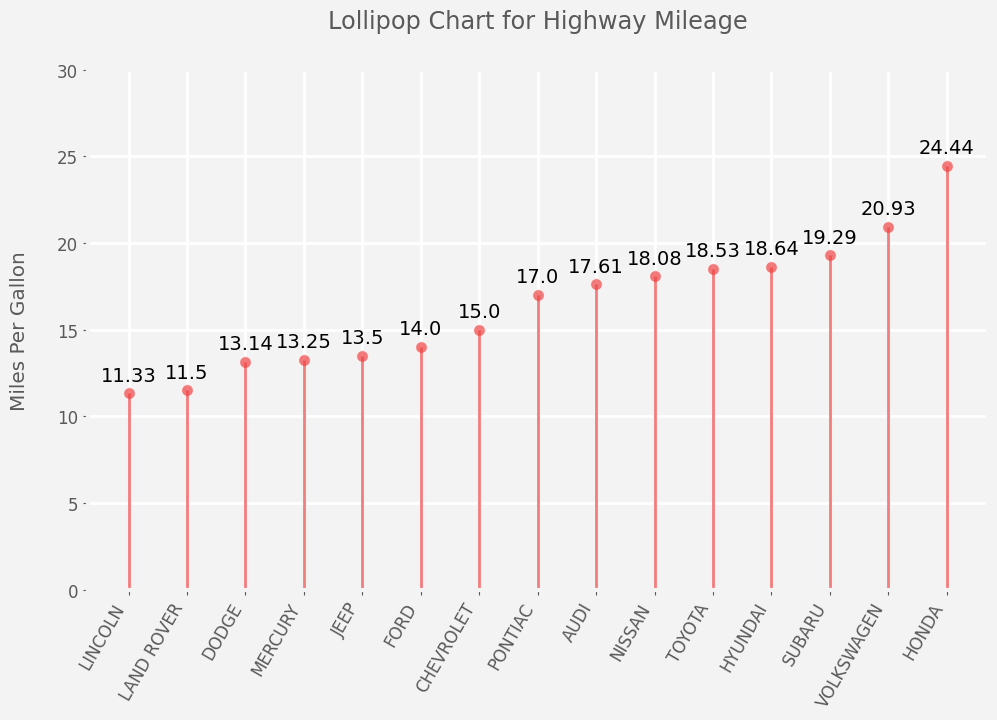

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots()
ax.vlines(x=df.index, ymin=0, ymax=df.cty, alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage')
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right'})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.subplots_adjust(left=0.15, bottom=0.2, top=0.85, right=0.9)
plt.show()

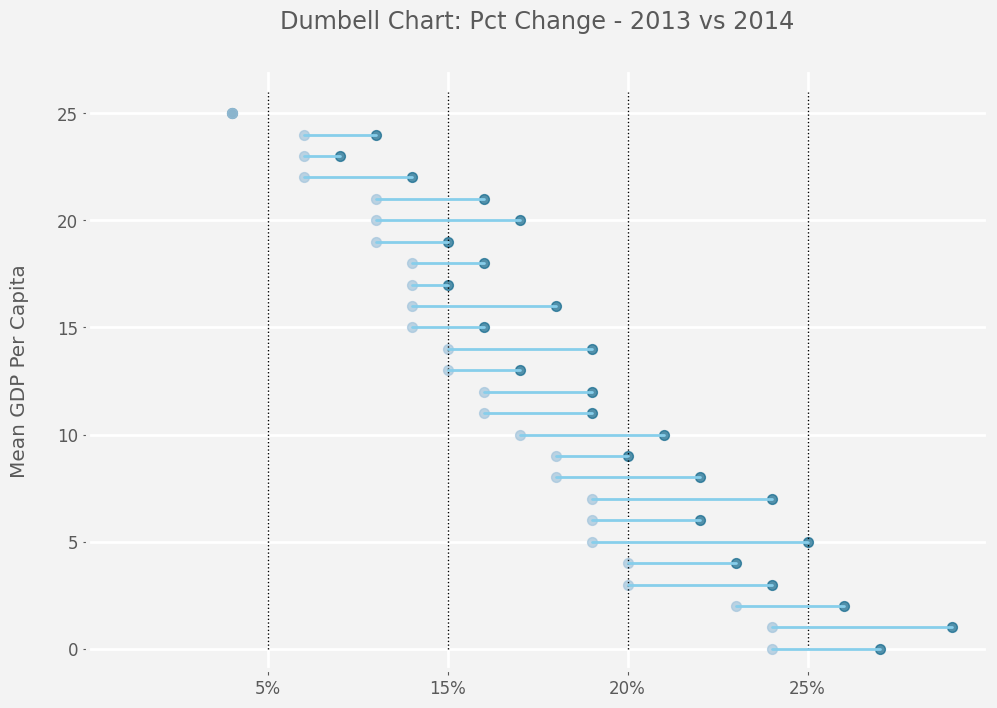

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots()

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014")
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
plt.subplots_adjust(left=0.15, bottom=0.1, top=0.85, right=0.9)
plt.show()
